<a href="https://colab.research.google.com/github/goudaChees/GOF/blob/master/0628(PCA%2CLDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

In [ ]:
X_r.shape

(150, 2)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit_transform(X, y)

In [ ]:
# Percentage of variance explained for each components
print('Explained variance ratio (first two components): {}'.format(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.92461872 0.05306648]


Text(0.5, 1.0, 'PCA of IRIS dataset')

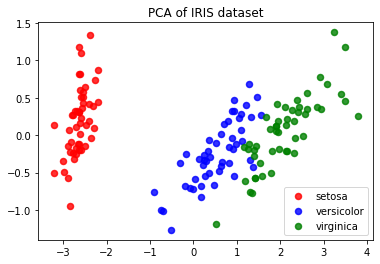

In [ ]:
colors = ['red', 'blue', 'green']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=1.5, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
#다양한 형태로 값을 바꿔가며 테스트 해보기  

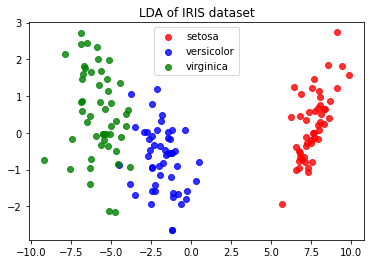

In [ ]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

### Manifold Learning


In [ ]:
from mpl_toolkits import mplot3d
from sklearn import manifold

In [ ]:
X, t = datasets.make_swiss_roll(n_samples=1500)

In [ ]:
X.shape

(1500, 3)

In [ ]:
t.shape

(1500,)

In [ ]:
t

array([ 4.86614935, 12.31292486,  7.98976891, ...,  4.95096069,
        7.51063546, 12.44112553])

Text(0.5, 0.92, 'Original data')

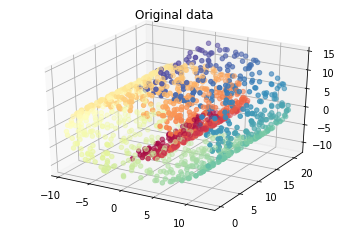

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
ax.set_title("Original data")

### Multidimensional Scaling (MDS)

In [ ]:
mds = manifold.MDS(n_components=2, max_iter=100)

In [ ]:
Y = mds.fit_transform(X)

Text(0.5, 1.0, 'MDS')

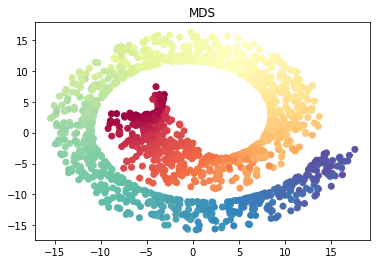

In [ ]:

plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('MDS')
#돌돌말린 것의 단면

### Isomap

In [ ]:
im = manifold.Isomap(n_neighbors=12, n_components=2)

In [ ]:
Y = im.fit_transform(X)

Text(0.5, 1.0, 'Isomap')

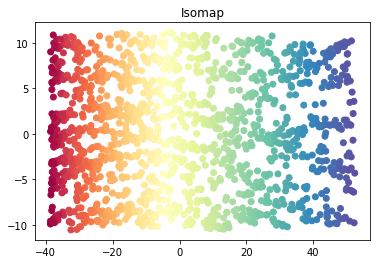

In [ ]:

plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('Isomap')
#펼친모양

### Locally Linear Embedding (LLE)

In [ ]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2)

In [ ]:
Y = lle.fit_transform(X)

Text(0.5, 1.0, 'LLE')

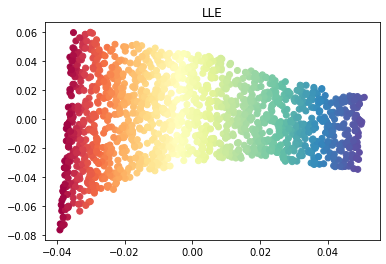

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title('LLE')
#펼친걸 살짝 틀은 모양

In [ ]:
#실제로는 알려준 알고리즘만 있는것이 아닌 훨씬 많이 있음. 

## PCA 실습
1. iris data 불러오기
2. petal length, petal width 컬럼으로 시각화
3. 스케일링 후 PCA 변환 수행 pc=3
4. pca 변환된 데이터 컬럼명 pc1 pc2로 변환
5. 차원축소 된 데이터로 데이터 시각화
6. component 변동성 비율 확인 
7. 원본 데이터와 pca 변ㄹ환된 데이터 기반으로 예측 성능 비교

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


** petal_length, petal_width 두개의 속성으로 데이터 산포 시각화 **

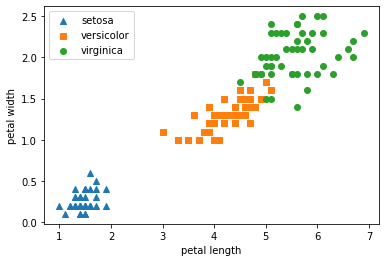

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

** 평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환 **

In [ ]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [ ]:
iris_scaled.shape

(150, 4)

** PCA 변환 수행 **

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 3)


In [ ]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2', 'pca_component_3']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,pca_component_3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0


** PCA로 차원 축소된 피처들로 데이터 산포도 시각화 **

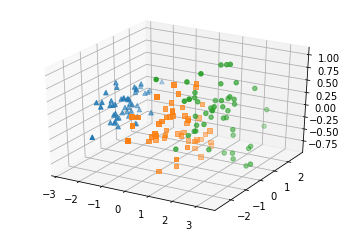

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']
ax = plt.axes(projection='3d')
#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    z_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_3']
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, marker=marker,label=iris.target_names[i])

#plt.legend()
#plt.xlabel('pca_component_1')
#plt.ylabel('pca_component_2')
#plt.show()

In [ ]:
##ax = plt.axes(projection='3d')
##ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.Spectral)
##ax.set_title("Original data")

** 각 PCA Component별 변동성 비율 **

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922]


** 원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교 **

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print(scores)
print(np.mean(scores))

[0.98 0.94 0.96]
0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2','pca_component_3']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print(scores_pca)
print(np.mean(scores_pca))

[0.92 0.92 0.94]
0.9266666666666667


In [ ]:
# 꽤 수치가 올라옴. 

## LDA 실습
1. iris data 불러오기
2. petal length, petal width 컬럼으로 시각화
3. 스케일링 후 LDA 변환 수행 c=3
4. pca 변환된 데이터 컬럼명 lda1 lda2 lda3 로 변환
5. 차원축소 된 데이터로 데이터 시각화
6. component 변동성 비율 확인 
7. 원본 데이터와 pca 변환된 데이터 / lda  성능 비교

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
# fit()호출 시 target값 입력 
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


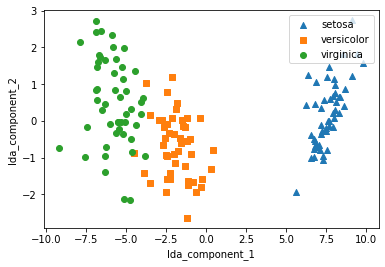

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

(150, 2)


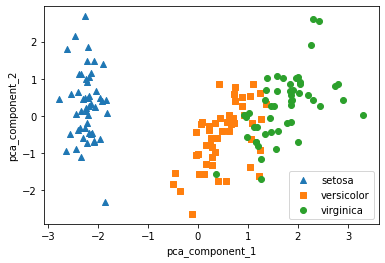

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
print(lda.explained_variance_ratio_)

[0.9912126 0.0087874]
